In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from pandarallel import pandarallel
import regex as re
import glob
import os
pandarallel.initialize(progress_bar=True, nb_workers= 16, verbose = 0)
tqdm.pandas()

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import interpolate
import numpy as np
from scipy.ndimage import gaussian_filter1d
from wordcloud import WordCloud

In [649]:
file_paths=[]
path = r'D:\GIT\Bachelor-Arbeit\notebooks\classifiers\poc\lda\lda_score_csv' # path
#path = r'/Users/kakaoohnehose/GitHub/Bachelor-Arbeit/notebooks/classifiers/poc/lda/lda_score_csv' # path
print(path)
#file_paths = [f for f in os.listdir(path) if f.endswith('.csv')]
for file in  glob.glob(os.path.join(path , "*_4.csv")):
    file_paths.append(file)
print("loading from :",len(file_paths),"files")
while '.csv' in file_paths:
    file_paths.remove('.csv')
#safe all file names as cleaned keys
regexp_1 = re.compile(r"(?P<size>\d{3,}(?=_topics.*))")
regexp_2 = re.compile(r"(?P<topics>\d{1,2}(?=\.csv))")
subst = ""
file_k_size = []
file_k_topic = []
file_k_b = []
i = 1
for str in file_paths:
    m = regexp_1.search(str)
    m2 = regexp_2.search(str)
    file_k_size.append(m.group("size"))
    file_k_topic.append(m2.group("topics"))



D:\GIT\Bachelor-Arbeit\notebooks\classifiers\poc\lda\lda_score_csv
loading from : 8 files


In [650]:
df


,size,Unnamed: 0,class,topic,count,num_topics,hits
index,,,,,,,
0,100,0,Ernährung,2.0,27,4,0.270000
1,100,1,Landwirtschaft,2.0,27,4,0.270000
2,100,2,Medizin,2.0,25,4,0.250000
3,100,3,Umweltwissenschaften,2.0,21,4,0.210000
7,400,7,Umweltwissenschaften,NaN,1,4,0.002500
...,...,...,...,...,...,...,...
4,5000000,4,Landwirtschaft,3.0,429303,4,0.085861
3,5000000,3,Landwirtschaft,1.0,115,4,0.000023
2,5000000,2,Ernährung,NaN,64,4,0.000013


In [620]:
arrays = np.array([file_k_size,file_k_topic])
#arrays=np.transpose(arrays)
mindex=pd.MultiIndex.from_arrays(arrays,names=("a","b"))
mindex

MultiIndex([(   '1000', '4'),
            (    '100', '4'),
            (  '16000', '4'),
            ( '256000', '4'),
            (   '4000', '4'),
            (    '400', '4'),
            ('5000000', '4'),
            (  '64000', '4')],
           names=['a', 'b'])

In [651]:
df = pd.concat(map(pd.read_csv,file_paths),keys=file_k_size)
df["num_topics"] = list(file_k_topic)[1]
df.index.set_names(["size", "index"], inplace=True)
df = df.sort_index(level=['size'], ascending=[True])
df=df.reset_index(level='size')
df['size']=df['size'].astype(int)
df= df.sort_values('size')

In [652]:
df['hits']= df['count'].astype(int) / df['size'].astype(int)


In [653]:
file_paths=[]
path = r'D:\GIT\Bachelor-Arbeit\notebooks\classifiers\poc\lda\lda_score_csv_test' # path
print(path)
#file_paths = [f for f in os.listdir(path) if f.endswith('.csv')]
for file in  glob.glob(os.path.join(path , "*.csv")):
    file_paths.append(file)
print("loading from :",len(file_paths),"files")
while '.csv' in file_paths:
    file_paths.remove('.csv')
#safe all file names as cleaned keys
regexp_1 = re.compile(r"(?P<size>\d{3,}(?=_topics.*))")
regexp_2 = re.compile(r"(?P<topics>\d{1,2}(?=\.csv))")
subst = ""
file_k_size = []
file_k_topic = []
file_k_b = []
i = 1
for str in file_paths:
    m = regexp_1.search(str)
    m2 = regexp_2.search(str)
    file_k_size.append(int(m.group("size")))
    file_k_topic.append(m2.group("topics"))

D:\GIT\Bachelor-Arbeit\notebooks\classifiers\poc\lda\lda_score_csv_test
loading from : 8 files


In [654]:
df1 = pd.concat(map(pd.read_csv,file_paths),keys=file_k_size)


In [655]:
df1.index.set_names(["size", "index"], inplace=True)
df1 = df1.sort_index(level=['size'], ascending=True)
df1.columns = ['Klassen', 'Support']
df1=df1.reset_index(level='size')
df1['size']=df1['size'].astype(int)
df1.reset_index(drop=True,inplace=True)


In [656]:
df2 = df1.groupby(['size']).sum()

C:\Users\Keks\AppData\Local\Temp\ipykernel_27836\3246857734.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2 = df1.groupby(['size']).sum()


In [657]:
newdf = pd.DataFrame(np.repeat(df2.values, 4, axis=0))
newdf.columns = df2.columns

In [658]:
df1['perc'] = df1['Support'] / newdf['Support']

In [661]:
df1['Klassen']=df1['Klassen'].replace(r'Ã¤','ä', regex=True)

In [662]:
df1

,size,Klassen,Support,perc
0,100,Medizin,9,0.391304
1,100,Landwirtschaft,7,0.304348
2,100,Umweltwissenschaften,5,0.217391
3,100,Ernährung,2,0.086957
4,400,Umweltwissenschaften,36,0.264706
5,400,Ernährung,34,0.250000
6,400,Medizin,33,0.242647
7,400,Landwirtschaft,33,0.242647
8,1600,Landwirtschaft,158,0.268251
9,1600,Medizin,153,0.259762


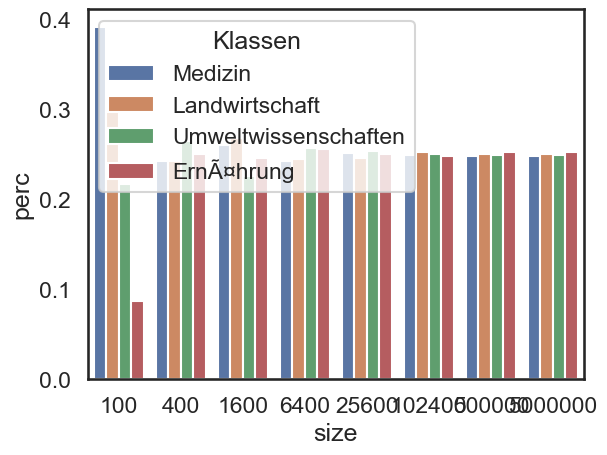

In [630]:
ax = sns.barplot(data=df1,x="size",  y="perc", hue="Klassen")

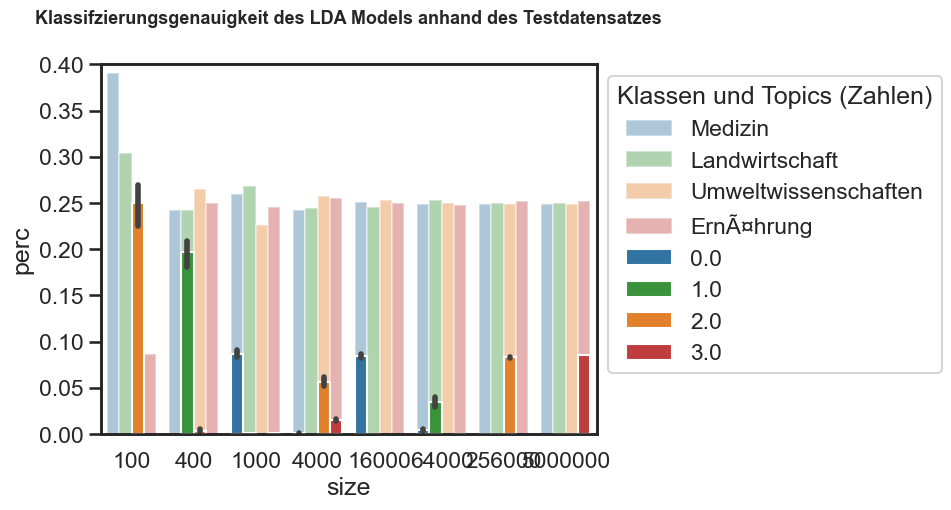

In [631]:
palette = {
    0: 'tab:blue',
    1: 'tab:green',
    2: 'tab:orange',
    3: 'tab:red',
}
palette1 = {
    'Medizin': 'tab:blue',
    'Landwirtschaft': 'tab:green',
    'Umweltwissenschaften': 'tab:orange',
    'ErnÃ¤hrung': 'tab:red',
}
fig = plt.figure()
ax = fig.add_subplot(111)
ax =  sns.barplot(data=df1,x="size",  y="perc", hue="Klassen", 
                        ax=ax,
                        palette=palette1, alpha=0.40) 

#ax.set(xlabel="Menge an Zugewiesenen Topics pro Klasse",ylabel="Klasse(Averbis) & Topic(LDA)")
ax.text(x=0.5, y=1.1, s='Klassifzierungsgenauigkeit des LDA Models anhand des Testdatensatzes',
        fontsize=13, weight='bold',
        ha='center', va='bottom', transform=ax.transAxes)

ax2 = ax.twinx()
ax2 = sns.barplot(data=df,x="size",  y="hits", hue="topic" , ax= ax2, palette=palette)
#ax.text(x=0.5, y=1.05, s="bei einer Testdatensatzgröße von " + str(len(df))+ " Publikationen und "+ list(file_k_topic)[1] +' "Topics"',
#        fontsize=8, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)
ax2.set_ylabel(None)
a= 0.0
b= 0.40
n = 0
ax.set_ylim(a,b)
ax2.set_ylim(a,b)
ax2.set_yticks(np.linspace(a,b,n))
#fig = ax.get_figure()
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2 , labels + labels2, loc=1, title="Klassen und Topics (Zahlen)")
ax2.legend([], [], frameon=False)
ax2.set_ylabel(None)
ax2.legend([], [], frameon=False)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

C:\Users\Keks\AppData\Local\Temp\ipykernel_27836\2866962927.py:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df,x="size",  y="hits", hue="topic" , ax=ax2,ci=None)


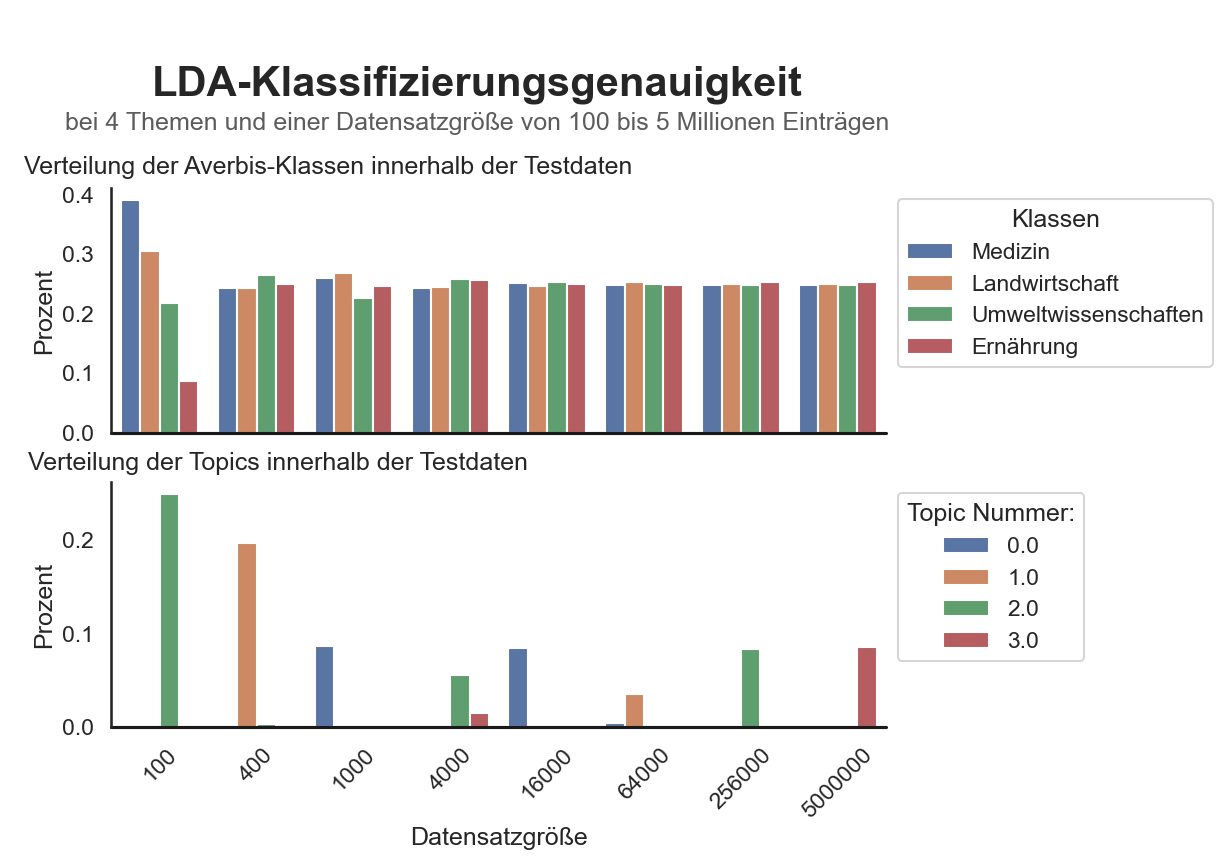

In [663]:
sns.set_theme(style="white", context="talk")

# Set up the matplotlib figure
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 7), sharex=True)

ax1.text(x=0.8, y=1.9, s='LDA-Klassifizierungsgenauigkeit',
        fontsize=30, weight='bold',
        ha='center', va='bottom', transform=ax.transAxes)
ax1.text(x=0.8, y=1.82, s="bei 4 Themen und einer Datensatzgröße von 100 bis 5 Millionen Einträgen",
        fontsize=18, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)

ax1.text(x=0.5, y=1.7, s="Verteilung der Averbis-Klassen innerhalb der Testdaten",
        fontsize=18, alpha=1, ha='center', va='bottom', transform=ax.transAxes)

ax1.text(x=0.4, y=0.9, s="Verteilung der Topics innerhalb der Testdaten",
        fontsize=18, alpha=1, ha='center', va='bottom', transform=ax.transAxes)

# Generate some sequential data
sns.barplot(data=df1,x="size",  y="perc", hue="Klassen", ax = ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Prozent")
ax1.set_xlabel("")
sns.move_legend(ax1, "upper left", bbox_to_anchor=(1, 1))



# Center the data to make it diverging
sns.barplot(data=df,x="size",  y="hits", hue="topic" , ax=ax2,ci=None)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("Prozent")
ax2.set_xlabel("Datensatzgröße")
ax2.legend(title= "Topic Nummer:")
sns.move_legend(ax2, "upper left", bbox_to_anchor=(1, 1))
ax2.tick_params(axis='x', rotation=45)

sns.despine(bottom=True)
#plt.setp(f.axes, yticks=[])
#plt.tight_layout(h_pad=2)
#f.savefig("grafiken\\LDA_f1_support_12.png",dpi=300, bbox_inches = "tight") 

In [865]:
file_paths=[]
path = r'D:\scores_csv' # path
print(path)
#file_paths = [f for f in os.listdir(path) if f.endswith('.csv')]
for file in  glob.glob(os.path.join(path , "*.csv")):
    file_paths.append(file)
print("loading from :",len(file_paths),"files")
while '.csv' in file_paths:
    file_paths.remove('.csv')
#safe all file names as cleaned keys
regexp_1 = re.compile(r"(?P<size>\d{3,}(?=_topics.*))")
regexp_2 = re.compile(r"(?P<topics>\d{1,2}(?=\.csv))")
subst = ""
file_k_size = []
file_k_topic = []
file_k_b = []
i = 1
for str in file_paths:
    m = regexp_1.search(str)
    m2 = regexp_2.search(str)
    file_k_size.append(int(m.group("size")))
    file_k_topic.append(m2.group("topics"))

D:\scores_csv
loading from : 0 files


In [4]:
df1 = pd.concat(map(pd.read_csv,file_paths),keys=file_k_size)


In [5]:

df1['1']=df1['1'].replace(r'[^a-zA-Z]',' ', regex=True)

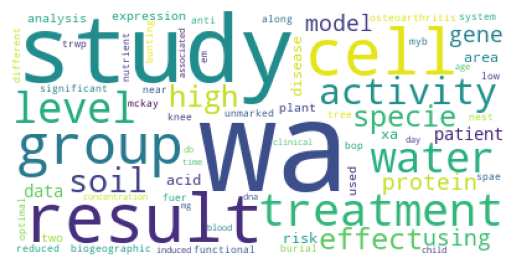

In [17]:
text = ' '.join(df1['1'])
wordcloud = WordCloud(background_color='white').generate(text)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [14]:
text

array(['       soil           specie           plant           functional           wa           risk           osteoarthritis           group           result           knee ',
       '       bop           along           wa                      specie           myb           bunting           high           mckay           biogeographic ',
       '       wa           spae           effect           trwp           low           significant           study           level           reduced           treatment ',
       '       burial           nest           tree           near           study           plant           optimal           unmarked           water           nutrient ',
       '                  wa           cell           protein           study           gene           two           result           activity           effect ',
       '       wa                      study           model           result           using           different           soil           water 

In [866]:
file_paths=[]
path = r'D:\GIT\Bachelor-Arbeit\notebooks\classifiers\poc\lda\\scores_csv\classified' # path
print(path)
#file_paths = [f for f in os.listdir(path) if f.endswith('.csv')]
for file in  glob.glob(os.path.join(path , "Klasse_zu_pub_25600_topics_4.csv")):
    file_paths.append(file)
print("loading from :",len(file_paths),"files")
while '.csv' in file_paths:
    file_paths.remove('.csv')
#safe all file names as cleaned keys
regexp_1 = re.compile(r"(?P<size>\d{3,}(?=_topics.*))")
regexp_2 = re.compile(r"(?P<topics>\d{1,2}(?=\.csv))")
subst = ""
file_k_size = []
file_k_topic = []
file_k_b = []
i = 1
for str in file_paths:
    m = regexp_1.search(str)
    m2 = regexp_2.search(str)
    file_k_size.append(int(m.group("size")))
    file_k_topic.append(m2.group("topics"))

D:\GIT\Bachelor-Arbeit\notebooks\classifiers\poc\lda\\scores_csv\classified
loading from : 1 files


In [867]:
df1 = pd.concat(map(pd.read_csv,file_paths),keys=file_k_size)


In [789]:
df1.index.set_names(["size", "index"], inplace=True)

In [868]:
df1['topic']=df1['topic'].astype("str")

In [881]:
df1['topic']=df1['topic'].replace(r'0.0','0', regex=True)
df1['topic']=df1['topic'].replace(r'1.0','1', regex=True)
df1['topic']=df1['topic'].replace(r'2.0','2', regex=True)
df1['topic']=df1['topic'].replace(r'3.0','3', regex=True)
df1['class']=df1['class'].replace(r'ErnÃ¤hrung','Ernährung', regex=True)

In [882]:
df1

Unnamed: 0                                          record_id  \
25600 0              0                                AGRISUS201400113856   
      1              1  BASE::ftdoajarticles:oai:doaj.org/article:8ee5...   
      2              2                               AGRICOLAIND606853253   
      3              3                                           M2403256   
      4              4  BASE::ftifpriir:oai:ebrary.ifpri.org:p15738col...   
...                ...                                                ...   
      8795        8795  BASE::ftcopernicus:oai:publications.copernicus...   
      8796        8796                                AGRICOLAFNI88002246   
      8797        8797                                           M2826340   
      8798        8798                                AGRISUS201400104206   
      8799        8799  BASE::ftdoajarticles:oai:doaj.org/article:7258...   

                           class  \
25600 0           Landwirtschaft   
      1           Landwirtschaft   
      2           Landwirtschaft   
      3                  Medizin   
      4     Umweltwissenschaften   
...                          ...   
      8795  Umweltwissenschaften   
      8796             Ernährung   
      8797               Medizin   
      8798  Umweltwissenschaften   
      8799               Medizin   

                                                     combined topic  certainty  
25600 0     ,numerous,country,genetic,resource,conserved,c...     1   0.968955  
      1     ,spirulina,type,filamentous,blue,green,microal...     1   0.980707  
      2     ,molecular,morphological,evidence,support,new,...     1   0.989648  
      3     ,carnobacterium,piscicola,lv,isolated,vacuum,p...     1   0.991216  
      4     ,paper,provides,assessment,information,flow,ac...     1   0.987141  
...                                                       ...   ...        ...  
      8795  ,cover,effect,fluvial,bedrock,erosion,major,co...     1   0.970956  
      8796  ,extract,prospective,study,vegetarian,recruite...     1   0.982603  
      8797  ,shown,modulation,intracellular,calcium,ebv,la...     1   0.991016  
      8798  ,faster,cost,effective,methodology,developed,e...     1   0.991829  
      8799  ,extracellular,vesicle,evs,nanoparticles,origi...     1   0.817113  

[8800 rows x 6 columns]

In [889]:
confusion_matrix = pd.crosstab(df1["class"], df1["topic"])

In [768]:
confusion_matrix = [['class', '0.0', '1.0', '2.0', '3.0'],
                    ['Ernährung', 128, 2336, 138, 23],
                    ['Landwirtschaft', 139, 2435, 91, 13],
                    ['Medizin', 132, 2432, 106, 21],
                    ['Umweltwissenschaften', 129, 2352, 166, 27]]

classes = [row[0] for row in confusion_matrix[1:]]
confusion_dict = {klass: [int(val) for val in row[1:]] for klass, row in zip(classes, confusion_matrix[1:])}

# Berechne Precision- und Recall-Werte für jede Klasse
for klass in confusion_dict.keys():
    tp = confusion_dict[klass][classes.index(klass)]
    fp = sum([confusion_dict[klass2][classes.index(klass)] for klass2 in classes if klass2 != klass])
    fn = sum(confusion_dict[klass][0:classes.index(klass)] + confusion_dict[klass][classes.index(klass)+1:])
    
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    
    f1_score = 2 * (precision * recall) / (precision + recall)
    
    print(f"F1 score for class {klass}: {f1_score}")


F1 score for class Ernährung: 0.08119251506501744
F1 score for class Landwirtschaft: 0.3981034905583259
F1 score for class Medizin: 0.06641604010025064
F1 score for class Umweltwissenschaften: 0.019579405366207395


In [890]:
df = confusion_matrix

In [891]:
df2 = df1['class'].value_counts()

In [892]:
df2

Ernährung               2210
Landwirtschaft          2207
Umweltwissenschaften    2202
Medizin                 2181
Name: class, dtype: int64

In [895]:
df

topic,1,3,nan
class,,,
Ernährung,2197,11,2
Landwirtschaft,2196,9,2
Medizin,2168,12,1
Umweltwissenschaften,2177,22,3
